<a href="https://colab.research.google.com/github/vivek2606/Data-Science-Projects/blob/master/Learning_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import models
from keras import layers

In [2]:
network = models.Sequential()

In [3]:
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [4]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])

In [5]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
len(test_labels)

10000

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [12]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2580 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1041 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0688 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0504 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0378 - accuracy: 0.9886


In [14]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9795


In [16]:
print('test_acc:', test_acc)

test_acc: 0.9794999957084656


In [17]:
import numpy as np
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [18]:
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

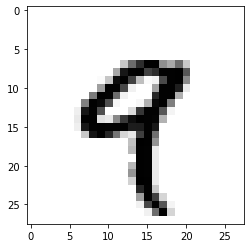

In [20]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [21]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [22]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [23]:
## Using Functional API
input_tensor = layers.Input(shape=(784))

In [24]:
x = layers.Dense(512,activation='relu')(input_tensor)
output_tensor = layers.Dense(10,activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [25]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

In [26]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [27]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [28]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0120 - accuracy: 0.9231
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0053 - accuracy: 0.9661
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0037 - accuracy: 0.9772
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0028 - accuracy: 0.9831
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0022 - accuracy: 0.9869
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0018 - accuracy: 0.9893
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0014 - accuracy: 0.9915
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0012 - accuracy: 0.9928
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 9.9559e-04 - accuracy: 0.9944
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 8.8282e-04 - accuracy

# Classifying Movie Reviews: A Binary Classification Example

In [29]:
from keras.datasets import imdb

In [30]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [31]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [32]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
train_data[1]

In [34]:
max([max(sequence) for sequence in train_data])

9999

In [35]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index

In [37]:
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)

In [ ]:
reverse_word_index

In [39]:
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [40]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [45]:
## Encoding the integer sequences into a binary matrix (One Hot Encoding)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


In [46]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [48]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [49]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [67]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [68]:
## Setting Aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [69]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [70]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4954 - acc: 0.7957 - val_loss: 0.3754 - val_acc: 0.8709
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2943 - acc: 0.9054 - val_loss: 0.3107 - val_acc: 0.8817
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2197 - acc: 0.9289 - val_loss: 0.2869 - val_acc: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1729 - acc: 0.9446 - val_loss: 0.2732 - val_acc: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1428 - acc: 0.9553 - val_loss: 0.2910 - val_acc: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1183 - acc: 0.9631 - val_loss: 0.2915 - val_acc: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0982 - acc: 0.9713 - val_loss: 0.3148 - val_acc: 0.8851
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0807 - a

In [71]:
history_dict = history.history

In [72]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
loss_values = history_dict['loss']
val_loss_vals = history_dict['val_loss']
epochs = range(1,len(acc) + 1)


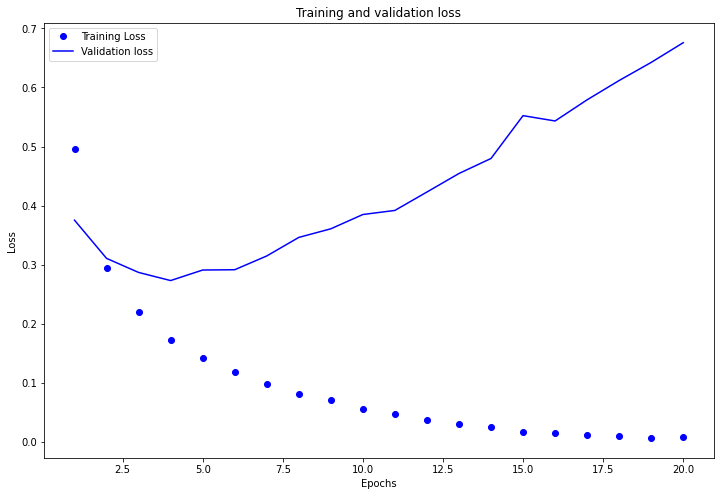

In [81]:
plt.figure(figsize=(12,8))
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_vals, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

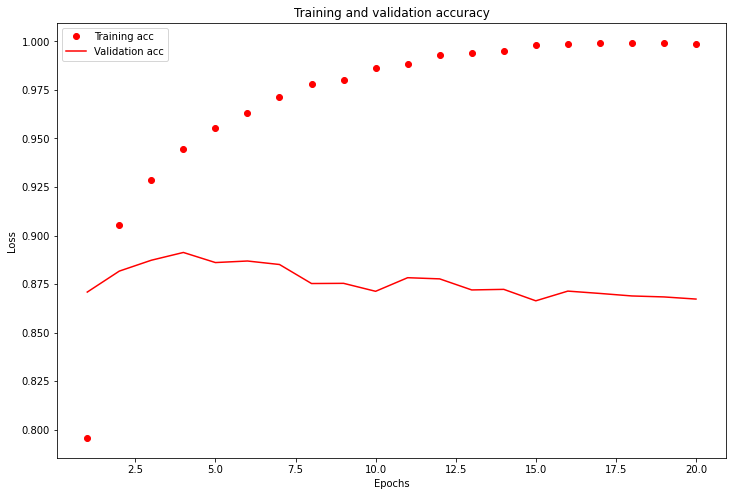

In [82]:
plt.clf()
plt.figure(figsize=(12,8))
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:
## Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [84]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.4511 - accuracy: 0.8183
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2560 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1978 - accuracy: 0.9293
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2927 - accuracy: 0.8845


In [85]:
results

[0.29265254735946655, 0.8844799995422363]

In [86]:
model.predict([x_test])

array([[0.20070034],
       [0.9999119 ],
       [0.8548132 ],
       ...,
       [0.13436121],
       [0.06798577],
       [0.43257016]], dtype=float32)